표준정규분포, 자유도가 2인 카이제곱분포, $\alpha = 10, \beta = 2$인 베타분포에서의 난수 추출 및 분위수 비교

In [2]:
set_norm <- rnorm(100)
set_chi <- rchisq(100, 2)
set_beta <- rbeta(100, 10, 2)

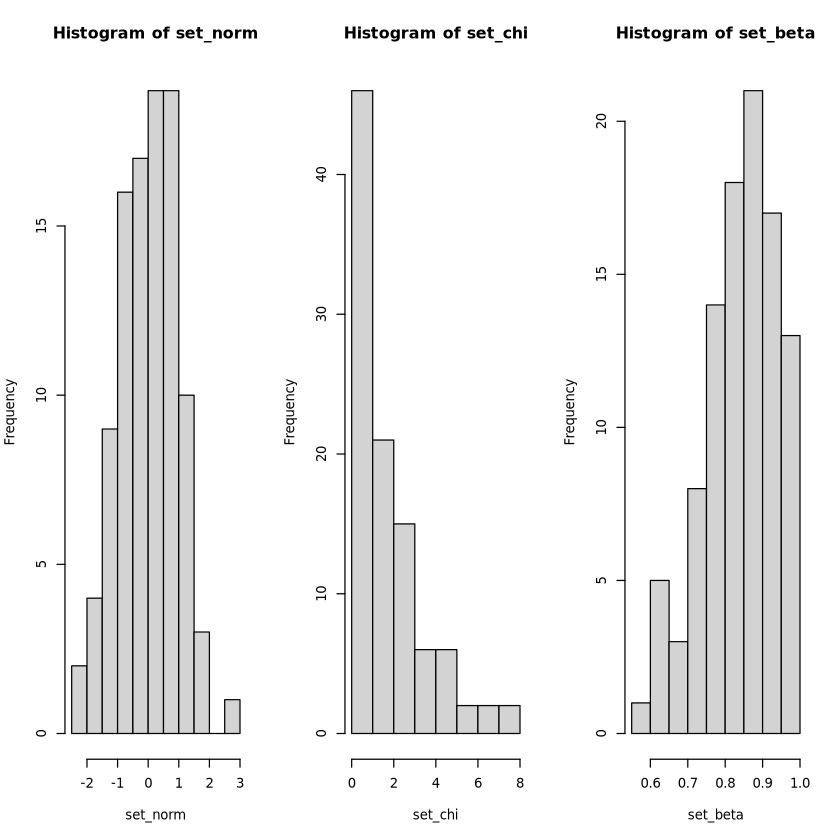

In [5]:
par(mfcol = c(1,3))
hist(set_norm)
hist(set_chi)
hist(set_beta)
par(mfrow = c(1,1))

In [7]:
quantile(set_norm, c(0.0625, 0.125, 0.25, 0.5), type = 8)

6.25%      12.5%        25%        50% 
-1.5054749 -1.1292334 -0.5646327  0.1246873

In [9]:
quantile(set_chi, c(0.0625, 0.125, 0.25, 0.5), type = 8)

6.25%     12.5%       25%       50% 
0.1399062 0.2459814 0.4664972 1.2355142

In [10]:
quantile(set_beta, c(0.0625, 0.125, 0.25, 0.5), type = 8)

6.25%     12.5%       25%       50% 
0.6741781 0.7238725 0.7821728 0.8503477

> $p(k) = \frac{k-\frac13}{N+\frac13}$ : k번째 수의 분위수
>
> $k(p) = Np + \frac{p}3 + \frac13$ : p분위수의 위치

### 상자그림

* Notched(움푹 패인) Box Plot

> 두 그룹에 대한 Notched Box Plot을 그렸을 때, confidence interval($±\frac{1.58*IQR}{\sqrt{n}}$)가 겹치는 구간이 있으면 중앙값이 다르다고 말할 수 없다.

상자 그림이 주어졌을 때, 힌지 값과 중앙값을 참고하여 왜도와 첨도를 구해 분포를 비교할 수 있다.

`-` 상자 그림 작성 순서

1. 다섯 수치 요약을 구함(최소값, 아래경첩, 중앙값, 위경첩, 최대값)
2. 위 아래 사분위수에 해당하는 위치에 상자를 그리고 상자 내에 중앙값을 표시
3. 양쪽 안울타리 값 IF(Inner Fance) 계산
    > $IF_L = H_L - 1.5spr(H)$
    >
    > $IF_U = H_U + 1.5spr(H)$
4. 양쪽 안울타리 안쪽에 있으면서 경계에 가장 가까운 값(인접값 : AV)을 찾고, 인접값과 상자의 양끝을 줄로 연결
5. 안울타리 바깥에 있는 자료 점을 특이값이라 간주하고 점으로 표시

* 특이점

$N(\mu, \sigma^2)$의 경우

> $H = \mu ± 0.675\sigma, ~~ spr(H) = 1.35\sigma$
>
> $IF = H ± 1.5spr(H) = \mu ± 2.7\sigma$

In [15]:
H = qnorm(0.75)
spr_H = 2*qnorm(0.75)
IF = H + 1.5*spr_H
IF

[1] 2.697959

In [17]:
pnorm(IF, lower.tail = FALSE)*2

[1] 0.006976603

> 0.007, 즉, 0.7%가 특이점이다. 자료의 수가 1000개라면 7개가 이상점의 개수이다.

In [19]:
data(trees)
attach(trees)

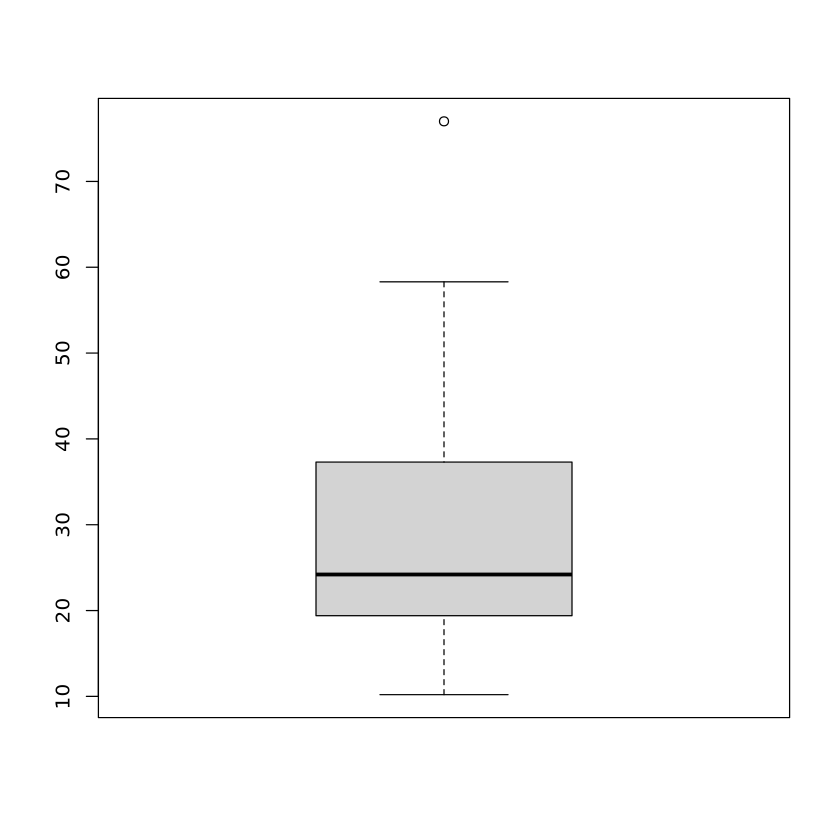

In [20]:
boxplot(Volume)

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


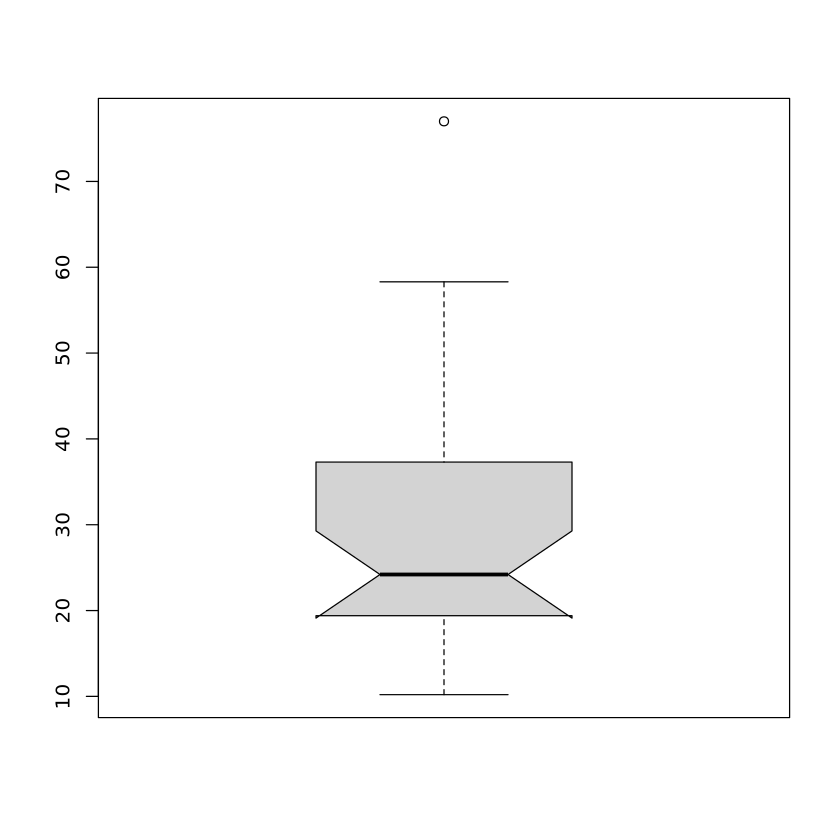

In [21]:
boxplot(Volume, notch = TRUE)

> 경사가 바뀌는 지점은 $M ± \frac{1.58spr(H)}{\sqrt{n}}$, 양 끝단은 아래경첩, 위경첩

* 여러 상자 그림의 비교

> 중위수 비교, 산포의 비교, 특이점(하한 / 상한)의 비교가 가능

```
## boxplot() option

notch = bool, ylab = chr, names = c(each_boxplot, names), main = chr, col = c(each, colors)
```

* `ggplot2`를 이용한 시각화

In [41]:
library(ggplot2)

In [48]:
data(iris)
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [64]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [66]:
c(0, 2, 20)[iris$Species]  ## 순서있는 범주형 자료의 경우 인덱싱처럼 처리가 가능함

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [76]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[101] 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
[126] 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20

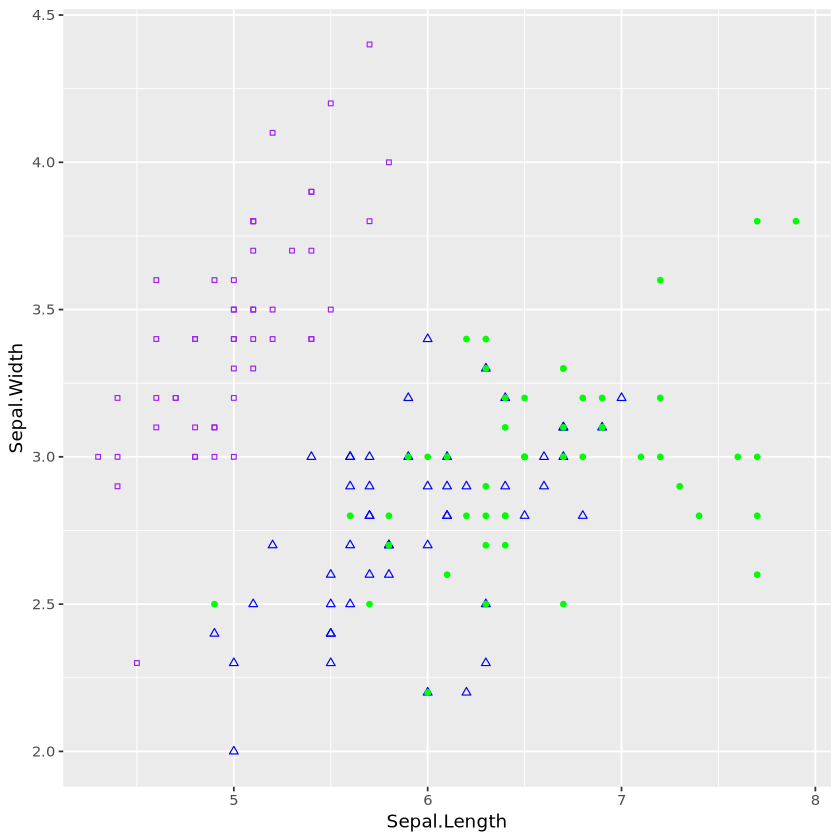

In [65]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) +
 geom_point(col = c("purple", "blue", "green")[iris$Species],
            pch = c(0, 2, 20)[iris$Species], cex = c(1, 1.5, 2)[iris$Species])
## 범주형 자료를 포함할 경우 그룹별로 붂을 수 있음

In [61]:
## + geom_line() + geom_boxplot() + geom_histogram() + geom_bar()

In [ ]:
## + geom_abline() + geom_hline() + geom_vline() + geom_rect() + geom_text()  ## 도형 그리기 함

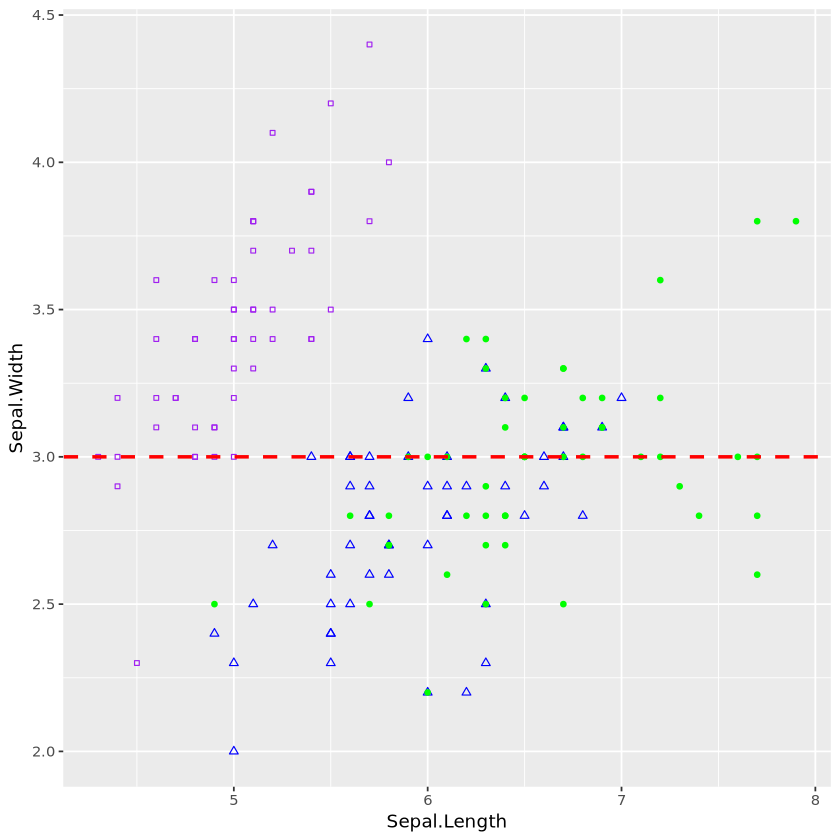

In [101]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) +
 geom_point(col = c("purple", "blue", "green")[iris$Species],
            pch = c(0, 2, 20)[iris$Species], cex = c(1, 1.5, 2)[iris$Species]) +
 geom_abline(slope = 0, intercept = 3, col = "red", lwd = 1, lty = 2)